# Smoothing

In [121]:
# Define box smoothing function
box_smooth <- function(signal, k = 0, window_size = 3) {
  if (k == 0) return(signal)
  smoothed <- signal
  
  for (iteration in 1:k) {
    n <- length(smoothed)
    temp <- numeric(n)
    
    for (i in 1:n) {
      start <- max(1, i - floor(window_size/2))
      end <- min(n, i + floor(window_size/2))
      temp[i] <- mean(smoothed[start:end], na.rm = TRUE)
    }
    
    smoothed <- temp
  }
  
  return(smoothed)
}

In [122]:
# Apply smoothing to all curves in printer_data
printer_smooth <- replicated_data %>%
  group_by(printer, replicate) %>%   
  mutate(intensity_smooth = box_smooth(intensity, k = k_value, window_size = 3)) %>%
  ungroup()


In [123]:
cat("✔ Data after smoothing:\n")
cat("Total rows:", nrow(printer_smooth), "\n")     # 52,500
cat("Unique printers:", n_distinct(printer_smooth$printer), "\n")   # 100
cat("Replicates each printer:", table(printer_smooth$replicate)[1], "\n\n")
head(printer_smooth)

✔ Data after smoothing:
Total rows: 52500 
Unique printers: 100 
Replicates each printer: 7500 



printer,spectra,intensity,replicate,intensity_smooth
<chr>,<dbl>,<dbl>,<int>,<dbl>
1,200.0000,9.377504,1,3779.521
1,224.3243,47.663054,1,7354.875
1,248.6486,223.204123,1,20254.735
1,272.9730,871.026053,1,55468.987
1,297.2973,3713.935938,1,144085.921
1,321.6216,13417.713287,1,353624.827


In [124]:
head(printer_smooth)

printer,spectra,intensity,replicate,intensity_smooth
<chr>,<dbl>,<dbl>,<int>,<dbl>
1,200.0000,9.377504,1,3779.521
1,224.3243,47.663054,1,7354.875
1,248.6486,223.204123,1,20254.735
1,272.9730,871.026053,1,55468.987
1,297.2973,3713.935938,1,144085.921
1,321.6216,13417.713287,1,353624.827


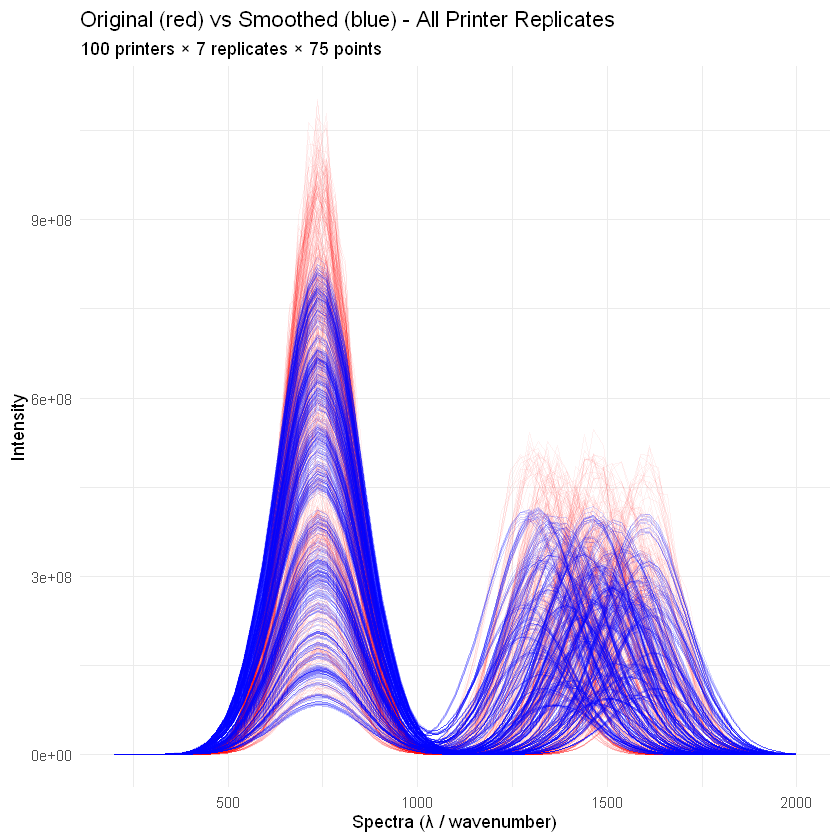

In [125]:
# Visualize all curves - before vs after smoothing
ggplot(printer_smooth, aes(x = spectra, group = interaction(printer, replicate))) +
  geom_line(aes(y = intensity), color = "red", alpha = 0.05, linewidth = 0.2) +
  geom_line(aes(y = intensity_smooth), color = "blue", alpha = 0.15, linewidth = 0.2) +
  labs(
    title = "Original (red) vs Smoothed (blue) - All Printer Replicates",
    subtitle = "100 printers × 7 replicates × 75 points",
    x = "Spectra (λ / wavenumber)",
    y = "Intensity"
  ) +
  theme_minimal()


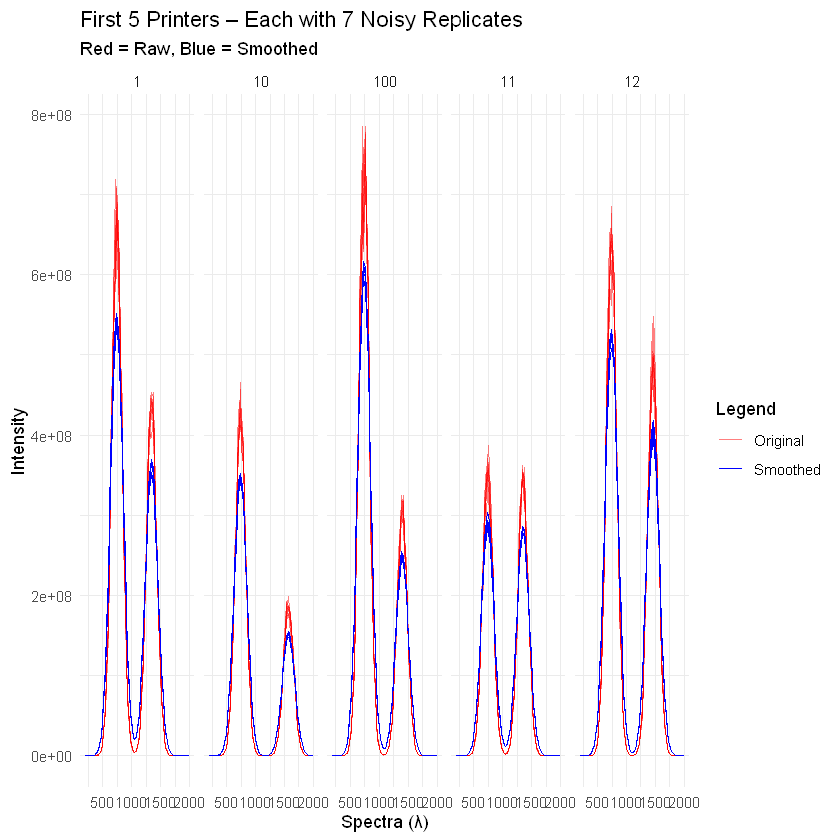

In [126]:
# Detailed view of first 5 curves
first_5 <- head(unique(printer_smooth$printer), 5)

printer_smooth %>%
  filter(printer %in% first_5) %>%
  ggplot(aes(x = spectra, group = interaction(printer, replicate))) +
  geom_line(aes(y = intensity, color = "Original"), alpha = 0.5) +
  geom_line(aes(y = intensity_smooth, color = "Smoothed")) +
  facet_wrap(~ printer, nrow = 1) +
  scale_color_manual(values = c("Original" = "red", "Smoothed" = "blue")) +
  labs(
    title = "First 5 Printers – Each with 7 Noisy Replicates",
    subtitle = "Red = Raw, Blue = Smoothed",
    x = "Spectra (λ)",
    y = "Intensity",
    color = "Legend"
  ) +
  theme_minimal()